In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd


rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
matplotlib.rcParams.update({'font.size': 12})

## Неорганизованный бой, без ввода резервов

In [2]:
lamda_1 = 3
lamda_2 = 5
p_1 = 0.6
p_2 = 0.6
a_1 = lamda_1 * p_1
a_2 = lamda_2 * p_2

In [3]:
N_10 = 300
N_20 = 300

In [4]:
casualties_for_retreat = 0.2
N_for_retreat_1 = N_10 * casualties_for_retreat
N_for_retreat_2 = N_20 * casualties_for_retreat

In [5]:
tau = 0
dt = 1e-3
N_1 = N_10
N_2 = N_20

t_arr = np.array([tau])
N_1_arr = np.array([N_1])
N_2_arr = np.array([N_2])

while (tau <= 1e3) and (N_1 > N_for_retreat_1) and (N_2 > N_for_retreat_2):
    tau += dt
    dN_1 = -a_2 * N_2 * N_1/N_10 * dt
    dN_2 = -a_1 * N_1 * N_2/N_20 * dt
    N_1 += dN_1
    N_2 += dN_2
#     print(tau, N_1, N_2)
    
    t_arr = np.append(t_arr, tau)
    N_1_arr = np.append(N_1_arr, N_1)
    N_2_arr = np.append(N_2_arr, N_2)

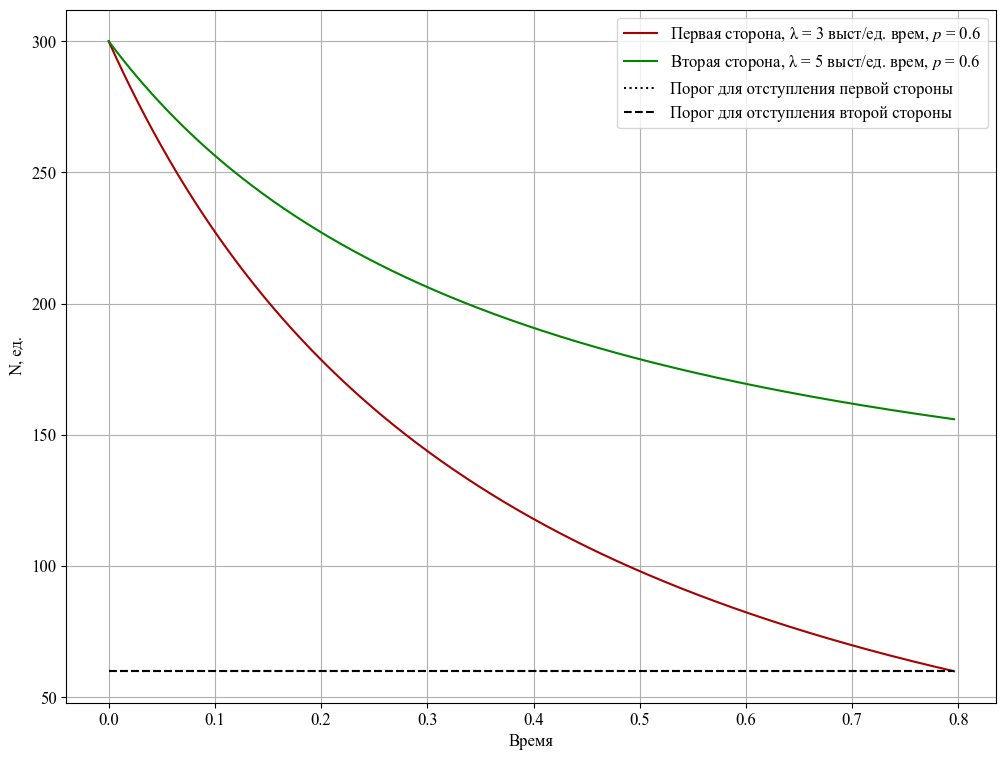

In [6]:
plt.figure(figsize=(12,9))
plt.plot(t_arr, N_1_arr, label='Первая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_1, p_1), color='#A60000')
plt.plot(t_arr, N_2_arr, label='Вторая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_2, p_2), color='#008500')

plt.plot([t_arr[0], t_arr[-1]], [N_for_retreat_1, N_for_retreat_1], linestyle=':', color='black', label='Порог для отступления первой стороны')
plt.plot([t_arr[0], t_arr[-1]], [N_for_retreat_2, N_for_retreat_2], linestyle='--', color='black', label='Порог для отступления второй стороны')

plt.xlabel('Время')
plt.ylabel('N, ед.')

plt.legend()
plt.grid()

## С вводом резервов в произвольный момент времени

In [7]:
lamda_1 = 3
lamda_2 = 5
p_1 = 0.6
p_2 = 0.6
a_1 = lamda_1 * p_1
a_2 = lamda_2 * p_2

In [8]:
N_10 = 300
N_20 = 300

In [9]:
casualties_for_retreat = 0.2
N_for_retreat_1 = N_10 * casualties_for_retreat
N_for_retreat_2 = N_20 * casualties_for_retreat

In [10]:
t_of_reinforcment = 0.28
N_of_reinforcment = 100

In [11]:
tau = 0
dt = 1e-3
N_1 = N_10
N_2 = N_20

t_arr = np.array([tau])
N_1_arr = np.array([N_1])
N_2_arr = np.array([N_2])

while (tau <= 1e3) and (N_1 > N_for_retreat_1) and (N_2 > N_for_retreat_2):
    tau += dt
    if round(tau, 5) == t_of_reinforcment:
        N_1 += N_of_reinforcment
        N_10 += N_of_reinforcment
    dN_1 = -a_2 * N_2 * N_1/N_10 * dt
    dN_2 = -a_1 * N_1 * N_2/N_20 * dt
    N_1 += dN_1
    N_2 += dN_2
#     print(tau, N_1, N_2)
    
    t_arr = np.append(t_arr, tau)
    N_1_arr = np.append(N_1_arr, N_1)
    N_2_arr = np.append(N_2_arr, N_2)

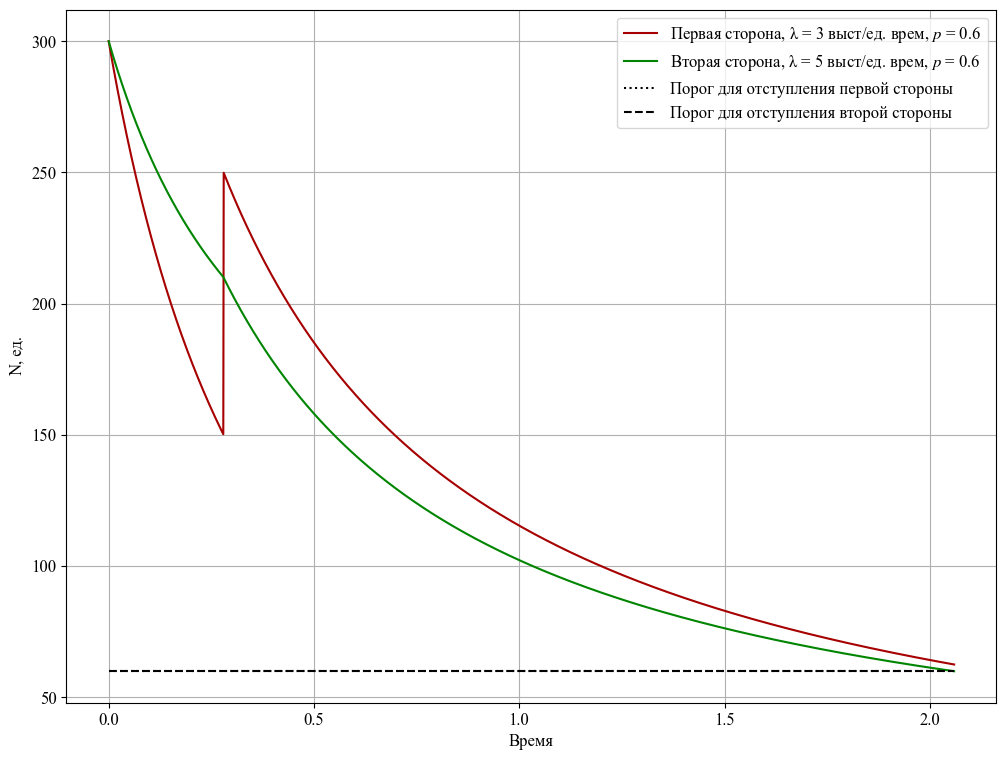

In [12]:
plt.figure(figsize=(12,9))
plt.plot(t_arr, N_1_arr, label='Первая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_1, p_1), color='#A60000')
plt.plot(t_arr, N_2_arr, label='Вторая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_2, p_2), color='#008500')

plt.plot([t_arr[0], t_arr[-1]], [N_for_retreat_1, N_for_retreat_1], linestyle=':', color='black', label='Порог для отступления первой стороны')
plt.plot([t_arr[0], t_arr[-1]], [N_for_retreat_2, N_for_retreat_2], linestyle='--', color='black', label='Порог для отступления второй стороны')

plt.xlabel('Время')
plt.ylabel('N, ед.')

plt.legend()
plt.grid()

## Найдем оптимальную величину времени ввода резервов с помощью оптимизации

In [13]:
lamda_1 = 3
lamda_2 = 5
p_1 = 0.6
p_2 = 0.6
a_1 = lamda_1 * p_1
a_2 = lamda_2 * p_2

In [14]:
N_10 = 300
N_20 = 300

In [15]:
casualties_for_retreat = 0.05
N_for_retreat_1 = N_10 * casualties_for_retreat
N_for_retreat_2 = N_20 * casualties_for_retreat

In [16]:
N_of_reinforcment = 100

In [17]:
tau = 0
dt = 1e-3
N_1 = N_10
N_2 = N_20

t_arr = np.array([tau])
N_1_arr = np.array([N_1])
N_2_arr = np.array([N_2])

while (tau <= 1e3) and (N_1 > N_for_retreat_1) and (N_2 > N_for_retreat_2):
    tau += dt
    dN_1 = -a_2 * N_2 * N_1/N_10 * dt
    dN_2 = -a_1 * N_1 * N_2/N_20 * dt
    N_1 += dN_1
    N_2 += dN_2
#     print(tau, N_1, N_2)
    
    t_arr = np.append(t_arr, tau)
    N_1_arr = np.append(N_1_arr, N_1)
    N_2_arr = np.append(N_2_arr, N_2)
    
t_guess = t_arr[-1]/3

In [18]:
history_t = np.array([])
history_n = np.array([])

def minimize_function(x):
    global N_20, history_t, history_n, N_of_reinforcment
    t_of_reinforcment = round(x[0], 3)
        
    tau = 0
    dt = 1e-4
    N_10 = 300
    N_1 = N_10
    N_2 = N_20

    t_arr = np.array([tau])
    N_1_arr = np.array([N_1])
    N_2_arr = np.array([N_2])

    while (tau <= 1e3) and (N_1 > N_for_retreat_1) and (N_2 > N_for_retreat_2):
        tau += dt
        if round(tau, 3) == round(t_of_reinforcment, 3):
            N_1 += N_of_reinforcment
            N_10 += N_of_reinforcment
        dN_1 = -a_2 * N_2 * N_1/N_10 * dt
        dN_2 = -a_1 * N_1 * N_2/N_20 * dt
        N_1 += dN_1
        N_2 += dN_2

        t_arr = np.append(t_arr, tau)
        N_1_arr = np.append(N_1_arr, N_1)
        N_2_arr = np.append(N_2_arr, N_2)
        
    history_t = np.append(history_t, t_of_reinforcment)
    history_n = np.append(history_n, (N_10 - N_1_arr[-1])/N_10)
        
    return (N_10 - N_1_arr[-1])/N_10

In [19]:
import scipy

In [20]:
res = scipy.optimize.minimize(fun=minimize_function, x0=t_guess, method='Nelder-Mead')
res

 final_simplex: (array([[0.00186667],
       [0.001925  ]]), array([0.07366068, 0.07366068]))
           fun: 0.0736606761917223
       message: 'Optimization terminated successfully.'
          nfev: 46
           nit: 22
        status: 0
       success: True
             x: array([0.00186667])

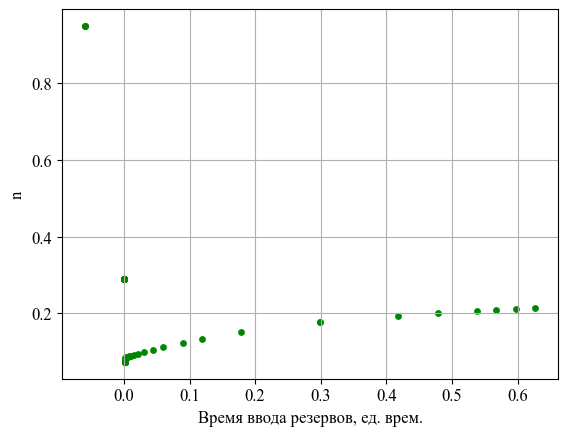

In [21]:
plt.scatter(history_t, history_n, color='#008500', s=15)
plt.xlabel('Время ввода резервов, ед. врем.')
plt.ylabel('n')
plt.grid()

In [22]:
t_of_reinforcment = round(res.x[0], 3)
t_of_reinforcment

0.002

In [23]:
tau = 0
dt = 1e-3
N_10 = 300
N_1 = N_10
N_2 = N_20

t_arr = np.array([tau])
N_1_arr = np.array([N_1])
N_2_arr = np.array([N_2])

while (tau <= 1e3) and (N_1 > N_for_retreat_1) and (N_2 > N_for_retreat_2):
    tau += dt
    if round(tau, 5) == t_of_reinforcment:
        N_1 += N_of_reinforcment
        N_10 += N_of_reinforcment
    dN_1 = -a_2 * N_2 * N_1/N_10 * dt
    dN_2 = -a_1 * N_1 * N_2/N_20 * dt
    N_1 += dN_1
    N_2 += dN_2
#     print(tau, N_1, N_2)
    
    t_arr = np.append(t_arr, tau)
    N_1_arr = np.append(N_1_arr, N_1)
    N_2_arr = np.append(N_2_arr, N_2)

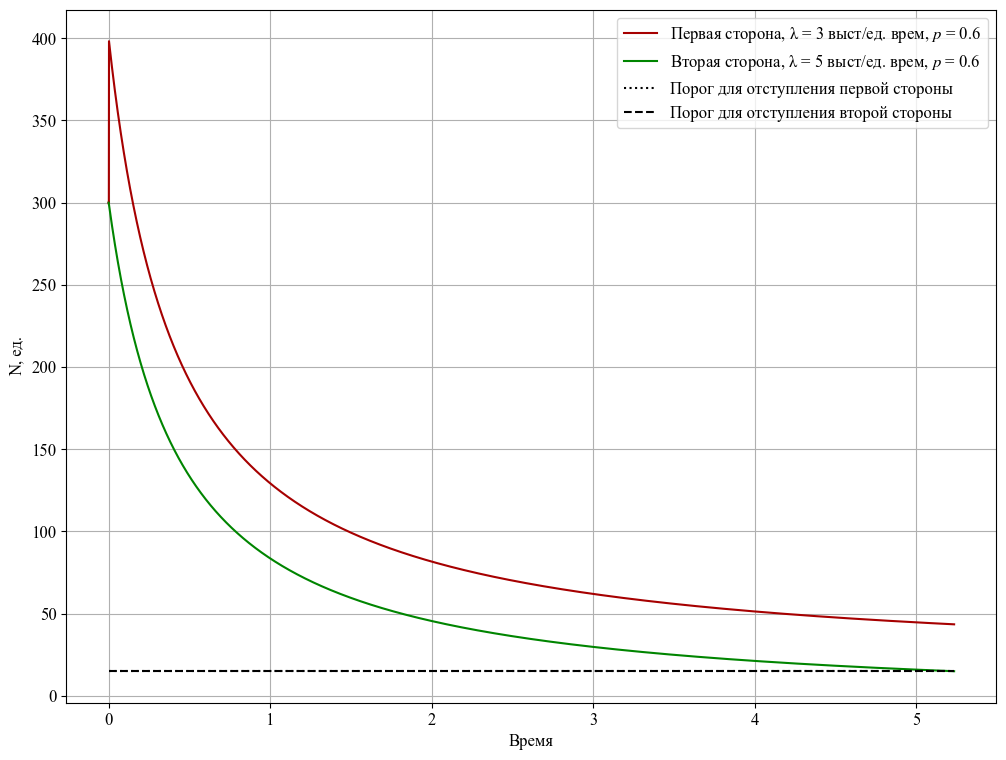

In [24]:
plt.figure(figsize=(12,9))
plt.plot(t_arr, N_1_arr, label='Первая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_1, p_1), color='#A60000')
plt.plot(t_arr, N_2_arr, label='Вторая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_2, p_2), color='#008500')

plt.plot([t_arr[0], t_arr[-1]], [N_for_retreat_1, N_for_retreat_1], linestyle=':', color='black', label='Порог для отступления первой стороны')
plt.plot([t_arr[0], t_arr[-1]], [N_for_retreat_2, N_for_retreat_2], linestyle='--', color='black', label='Порог для отступления второй стороны')

plt.xlabel('Время')
plt.ylabel('N, ед.')

plt.legend()
plt.grid()

#### Вывод: резервы лучше вводить чем раньше, тем лучше, желатьельно в следующий шаг по времени от начала боя

## Выполним проверку полным перебором

In [25]:
t_of_reinforcment_arr = np.linspace(0, 5, 10001)
t_of_reinforcment_arr

array([0.0000e+00, 5.0000e-04, 1.0000e-03, ..., 4.9990e+00, 4.9995e+00,
       5.0000e+00])

In [26]:
lamda_1 = 3
lamda_2 = 5
p_1 = 0.6
p_2 = 0.6
a_1 = lamda_1 * p_1
a_2 = lamda_2 * p_2

In [27]:
N_10 = 300
N_20 = 300

In [28]:
casualties_for_retreat = 0.05
N_for_retreat_1 = N_10 * casualties_for_retreat
N_for_retreat_2 = N_20 * casualties_for_retreat

In [29]:
N_of_reinforcment = 100

In [30]:
from tqdm import tqdm

In [31]:
history_t = np.array([])
history_n = np.array([])

for i in tqdm(range(len(t_of_reinforcment_arr))):
    tau = 0
    dt = 1e-2
    N_10 = 300
    N_1 = N_10
    N_2 = N_20

    t_arr = np.array([tau])
    N_1_arr = np.array([N_1])
    N_2_arr = np.array([N_2])

    while (tau <= 1e3) and (N_1 > N_for_retreat_1) and (N_2 > N_for_retreat_2):
        tau += dt
        if round(tau, 5) == t_of_reinforcment_arr[i]:
            N_1 += N_of_reinforcment
            N_10 += N_of_reinforcment
        dN_1 = -a_2 * N_2 * N_1/N_10 * dt
        dN_2 = -a_1 * N_1 * N_2/N_20 * dt
        N_1 += dN_1
        N_2 += dN_2
    #     print(tau, N_1, N_2)

        t_arr = np.append(t_arr, tau)
        N_1_arr = np.append(N_1_arr, N_1)
        N_2_arr = np.append(N_2_arr, N_2)
    
    if N_1_arr[-1] > N_2_arr[-1]:
        history_t = np.append(history_t, t_of_reinforcment_arr[i])
        history_n = np.append(history_n, (N_10 - N_1_arr[-1])/N_10)

100%|███████████████████████████████████████████████████████████████████████████| 10001/10001 [00:36<00:00, 274.34it/s]


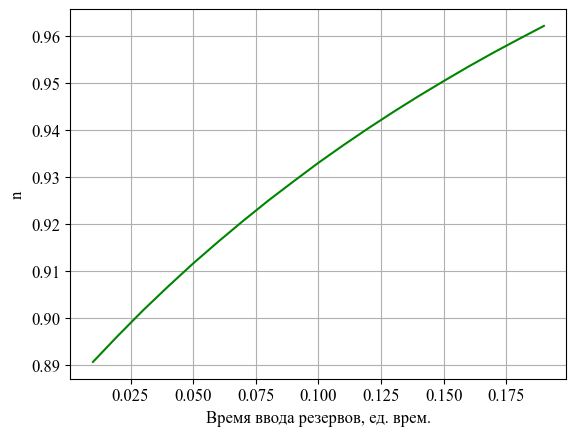

In [32]:
plt.plot(history_t, history_n, color='#008500')
plt.xlabel('Время ввода резервов, ед. врем.')
plt.ylabel('n')
plt.grid()

#### Минимальное время ввода резервов полным перебором

In [33]:
history_t[np.argmin(history_n)]

0.01